In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("C:\\Users\\jaisw\\Desktop\\Sabni_sir_project\\Covid_TS_dataset.csv",index_col='Date',parse_dates=True)

In [3]:
df.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
      

In [4]:
df.head()

,Cured,Deaths,Confirmed
Date,,,
2020-01-30,0,0,1
2020-01-31,0,0,1
2020-02-01,0,0,2
2020-02-02,0,0,3
2020-02-03,0,0,3


In [5]:
df.tail()

,Cured,Deaths,Confirmed
Date,,,
2020-04-21,3260,603,18985
2020-04-22,3960,652,20471
2020-04-23,4325,686,21700
2020-04-24,4814,723,23452
2020-04-25,5210,779,24893


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2020-01-30 to 2020-04-25
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Cured      87 non-null     int64
 1   Deaths     87 non-null     int64
 2   Confirmed  87 non-null     int64
dtypes: int64(3)
memory usage: 2.7 KB


In [7]:
df.dtypes

Cured        int64
Deaths       int64
Confirmed    int64
dtype: object

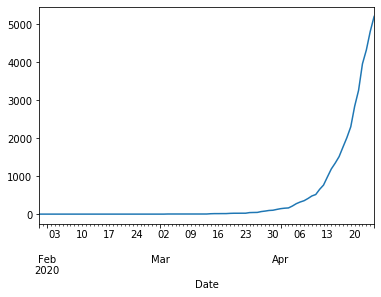

In [8]:
df['Cured'].plot()

In [9]:
from statsmodels.tsa.seasonal  import seasonal_decompose

In [12]:
result = seasonal_decompose(df['Cured'][33:], model = 'multiplicative')

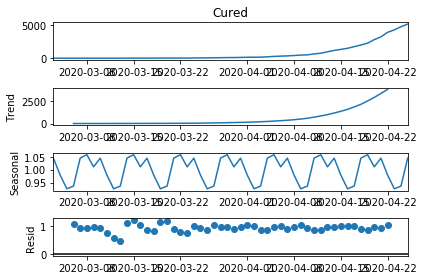

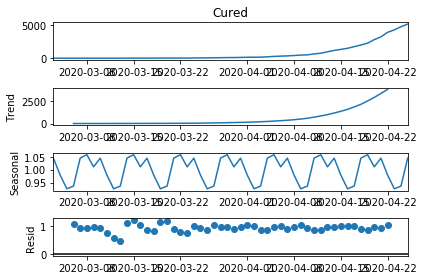

In [23]:
result.plot()

In [13]:
shifted_cured=df['Cured'].shift(fill_value=0)
df['New Cured Cases']=df['Cured']-shifted_cured
df

,Cured,Deaths,Confirmed,New Cured Cases
Date,,,,
2020-01-30,0,0,1,0
2020-01-31,0,0,1,0
2020-02-01,0,0,2,0
2020-02-02,0,0,3,0
2020-02-03,0,0,3,0
...,...,...,...,...
2020-04-21,3260,603,18985,418
2020-04-22,3960,652,20471,700
2020-04-23,4325,686,21700,365


In [14]:
shifted_deaths=df['Deaths'].shift(fill_value=0)
df['New Deaths']=df['Deaths']-shifted_deaths
df

,Cured,Deaths,Confirmed,New Cured Cases,New Deaths
Date,,,,,
2020-01-30,0,0,1,0,0
2020-01-31,0,0,1,0,0
2020-02-01,0,0,2,0,0
2020-02-02,0,0,3,0,0
2020-02-03,0,0,3,0,0
...,...,...,...,...,...
2020-04-21,3260,603,18985,418,44
2020-04-22,3960,652,20471,700,49
2020-04-23,4325,686,21700,365,34


In [15]:
shifted_confirmed=df['Confirmed'].shift(fill_value=0)
df['New Confirmed Cases']=df['Confirmed']-shifted_confirmed
df

,Cured,Deaths,Confirmed,New Cured Cases,New Deaths,New Confirmed Cases
Date,,,,,,
2020-01-30,0,0,1,0,0,1
2020-01-31,0,0,1,0,0,0
2020-02-01,0,0,2,0,0,1
2020-02-02,0,0,3,0,0,1
2020-02-03,0,0,3,0,0,0
...,...,...,...,...,...,...
2020-04-21,3260,603,18985,418,44,1329
2020-04-22,3960,652,20471,700,49,1486
2020-04-23,4325,686,21700,365,34,1229


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2020-01-30 to 2020-04-25
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Cured                87 non-null     int64
 1   Deaths               87 non-null     int64
 2   Confirmed            87 non-null     int64
 3   New Cured Cases      87 non-null     int64
 4   New Deaths           87 non-null     int64
 5   New Confirmed Cases  87 non-null     int64
dtypes: int64(6)
memory usage: 4.8 KB


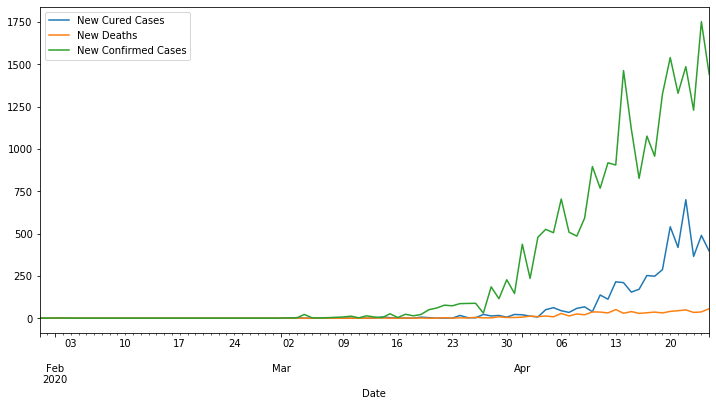

In [17]:
df[['New Cured Cases','New Deaths','New Confirmed Cases']].plot(figsize=(12,6))

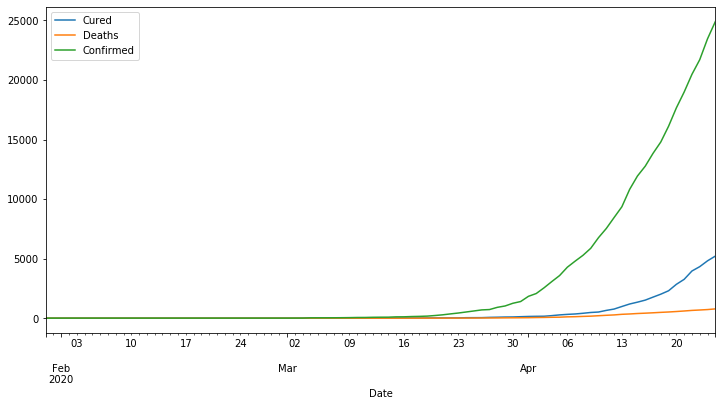

In [18]:
df[['Cured','Deaths','Confirmed']].plot(figsize=(12,6))

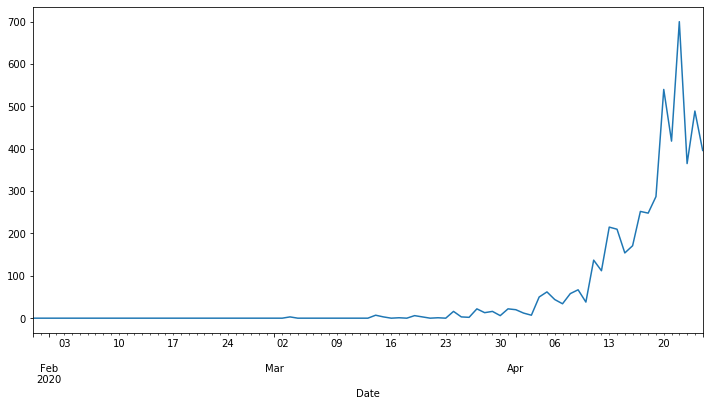

In [19]:
df['New Cured Cases'].plot(figsize=(12,6))

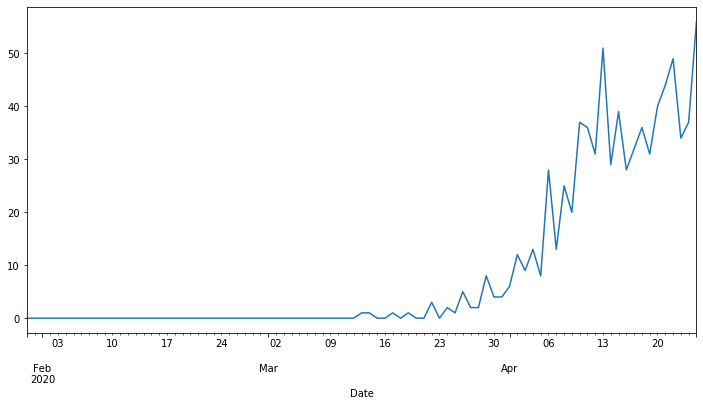

In [20]:
df['New Deaths'].plot(figsize=(12,6))

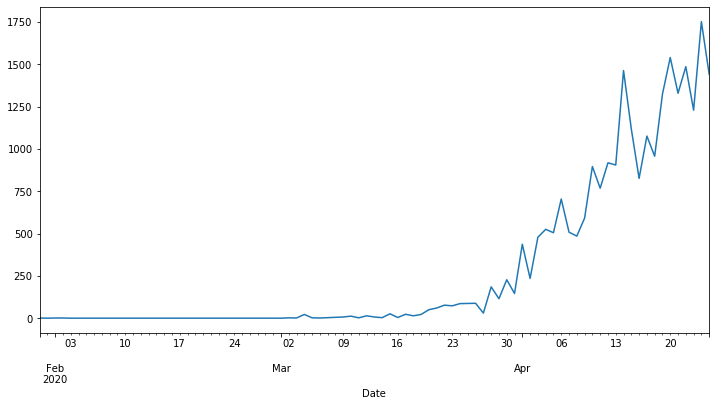

In [21]:
df['New Confirmed Cases'].plot(figsize=(12,6))

# Simple Moving Average 

A simple moving average (SMA) calculates the average of a selected range of values, by the number of periods in that range.

The Formula For SMA Is:


\begin{aligned} &\text{SMA}=\dfrac{A_1 + A_2 + ... + A_n}{n} \\ &\textbf{where:}\\ &A_n=\text{value at period } n\\ &n=\text{the number of total periods}\\ \end{aligned} 
​	 
​	Here we evaluate SMA by latest 3 observations by taking window size =3. That means calculating the next value by averaging previous 3 values.
So the equation we use here is:

\begin{aligned} &\text{SMA}=\dfrac{A_1 + A_2 + A_3}{3} \\ &\textbf{}\text{} \text{}\\ \end{aligned} 

As 'Cured' column has zero values till 2nd march 2020,i.e 2020-03-02, and we prefer to take all non zero entries to get a better model. So we take all non-zero observations from 2020-03-03 till 2020-04-15 to train the data(same as from index 33 to 76) and then make predictions on rest 10 observations.

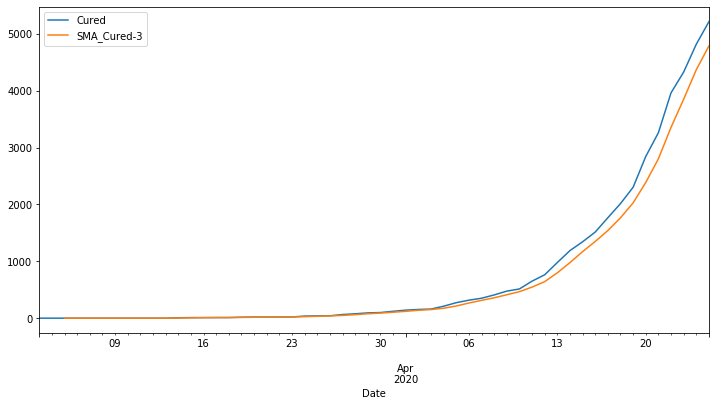

In [22]:
#Finding SMA and plotting it
df['SMA_Cured-3']=df['Cured'][33:].rolling(window=3).mean()
df[['Cured','SMA_Cured-3']][33:].plot(figsize=(12,6))

As 'Deaths' column has zero values till 12th march 2020,i.e 2020-03-12, and we prefer to take all non zero entries to get a better model. So we take all non-zero observations from 2020-03-13 till the last observation for all the models.

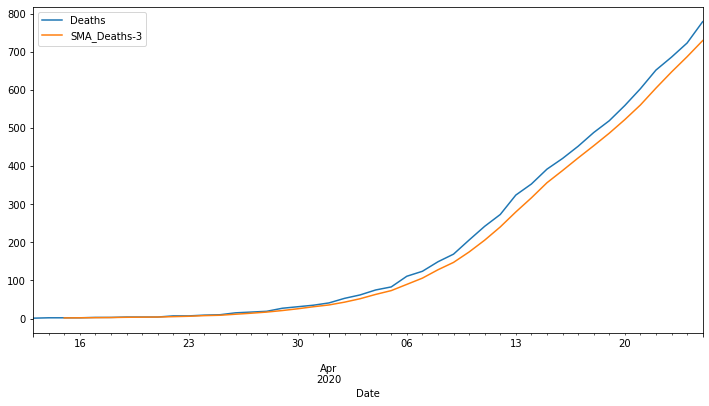

In [23]:
df['SMA_Deaths-3']=df['Deaths']['2020-03-13':].rolling(window=3).mean()
df[['Deaths','SMA_Deaths-3']]['2020-03-13':].plot(figsize=(12,6))

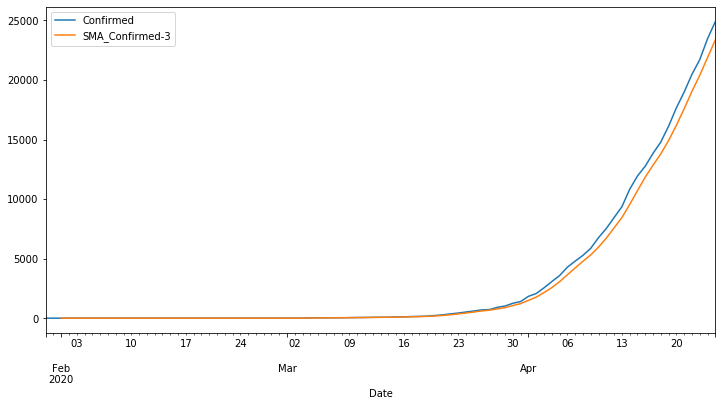

In [24]:
df['SMA_Confirmed-3']=df['Confirmed'].rolling(window=3).mean()
df[['Confirmed','SMA_Confirmed-3']].plot(figsize=(12,6))


# Weighted SMA

We just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses that are overcome by Exponentially Weighted Moving Average.

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size. Full details on Mathematics behind this can be found here. Here is the shorter version of the explanation behind EWMA.
The formula for EWMA is:

### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$



Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

The weight term $w_i$ depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$


When <tt>adjust=False</tt> is specified, moving averages are calculated as:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

When <tt>adjust=True</tt> we have $y_0=x_0$ and from the last representation above we have 
$y_t=\alpha x_t+(1−α)y_{t−1}$, therefore there is an assumption that $x_0$ is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

For the smoothing factor $\alpha$ one must have $0<\alpha≤1$, and while it is possible to pass <em>alpha</em> directly, it’s often easier to think about either the <em>span</em>, <em>center of mass</em> (com) or <em>half-life</em> of an EW moment:

Alpha is :


\begin{split}=
\begin{cases}
    \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

 * <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.

 *<strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$

* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function. <tt></tt>.

In [25]:
df['EWMA_Cured-3']=df['Cured']['2020-03-03':].ewm(adjust=False,span=3).mean()

In [26]:
df[['Cured','SMA_Cured-3','EWMA_Cured-3']]['2020-03-03':].head()

,Cured,SMA_Cured-3,EWMA_Cured-3
Date,,,
2020-03-03,3,NaN,3.0
2020-03-04,3,NaN,3.0
2020-03-05,3,3.0,3.0
2020-03-06,3,3.0,3.0
2020-03-07,3,3.0,3.0


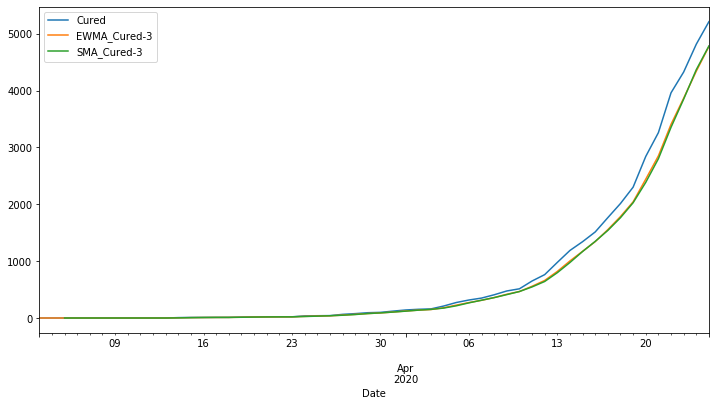

In [27]:
df[['Cured','EWMA_Cured-3','SMA_Cured-3']].plot(figsize=(12,6),xlim=('2020-03-03','2020-04-25'))

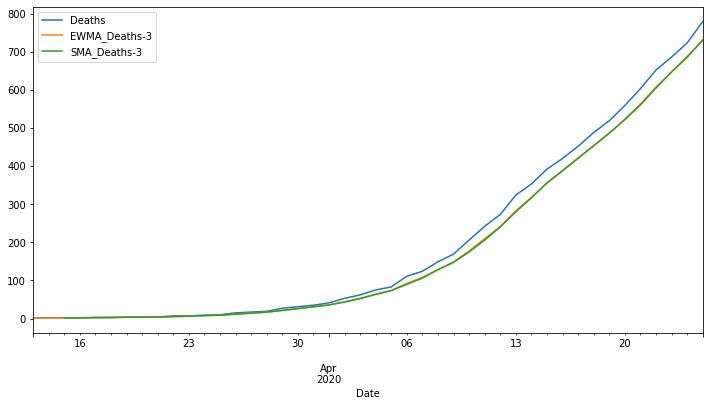

In [28]:
df['EWMA_Deaths-3']=df['Deaths']['2020-03-13':].ewm(adjust=False,span=3).mean()
df[['Deaths','EWMA_Deaths-3','SMA_Deaths-3']]['2020-03-13':].plot(figsize=(12,6))

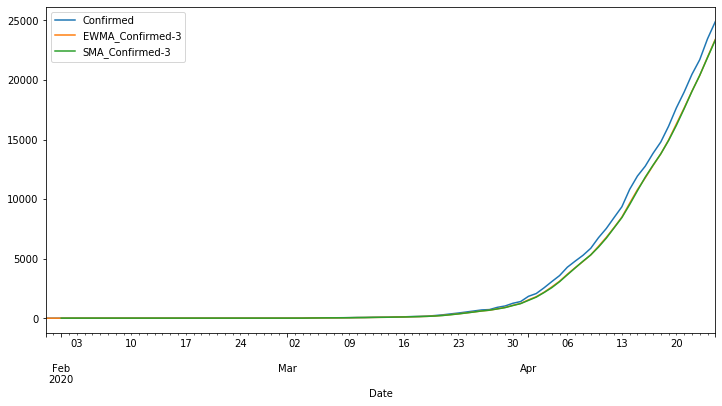

In [29]:
df['EWMA_Confirmed-3']=df['Confirmed'].ewm(adjust=False,span=3).mean()
df[['Confirmed','EWMA_Confirmed-3','SMA_Confirmed-3']].plot(figsize=(12,6))

# Exponential Smoothing

Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time.

In [30]:
df.index.freq='D'

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2020-01-30 to 2020-04-25
Freq: D
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cured                87 non-null     int64  
 1   Deaths               87 non-null     int64  
 2   Confirmed            87 non-null     int64  
 3   New Cured Cases      87 non-null     int64  
 4   New Deaths           87 non-null     int64  
 5   New Confirmed Cases  87 non-null     int64  
 6   SMA_Cured-3          52 non-null     float64
 7   SMA_Deaths-3         42 non-null     float64
 8   SMA_Confirmed-3      85 non-null     float64
 9   EWMA_Cured-3         54 non-null     float64
 10  EWMA_Deaths-3        44 non-null     float64
 11  EWMA_Confirmed-3     87 non-null     float64
dtypes: float64(6), int64(6)
memory usage: 11.3 KB


# Simple Exponential Smoothing


A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas <tt>.ewm()</tt> method:<br>
$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

In the previous section on Exponentially Weighted Moving Averages (EWMA) we applied Simple Exponential Smoothing using just one smoothing factor 
α
(alpha). This failed to account for other contributing factors like trend and seasonality.

We shift the 'SES_Cured-3' column fitted values upward by 1 beacause of the fact that we are using optimized value =False which gives two repeated starting values.

We here saw that the values from the Simple Exponential Smoothing and Exponentially Weighted Moving Average are same. And this is the case for all(Deaths and Confirmed cases too).




In [32]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
df.index.freq='D'
span = 4
alpha = 2/(span+1)

df['EWMA_Cured-3'] = df['Cured']['2020-03-03':].ewm(alpha=alpha,adjust=False).mean()
df['SES_Cured-3']=SimpleExpSmoothing(df['Cured']['2020-03-03':]).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df[['Cured','SMA_Cured-3','EWMA_Cured-3','SES_Cured-3']]['2020-03-03':].head()

,Cured,SMA_Cured-3,EWMA_Cured-3,SES_Cured-3
Date,,,,
2020-03-03,3,NaN,3.0,3.0
2020-03-04,3,NaN,3.0,3.0
2020-03-05,3,3.0,3.0,3.0
2020-03-06,3,3.0,3.0,3.0
2020-03-07,3,3.0,3.0,3.0


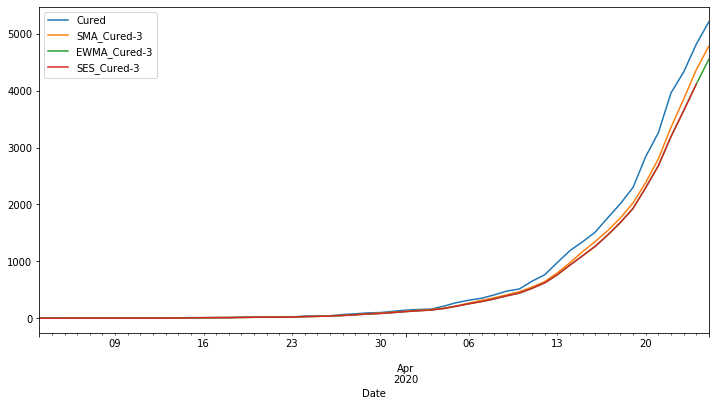

In [34]:
df[['Cured','SMA_Cured-3','EWMA_Cured-3','SES_Cured-3']]['2020-03-03':].plot(figsize=(12,6))

In [35]:
df['EWMA_Deaths-3'] = df['Deaths']['2020-03-13':].ewm(alpha=alpha,adjust=False).mean()
df['SES_Deaths-3']=SimpleExpSmoothing(df['Deaths']['2020-03-13':]).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df[['Deaths','SMA_Deaths-3','EWMA_Deaths-3','SES_Deaths-3']]['2020-03-13':].head()

,Deaths,SMA_Deaths-3,EWMA_Deaths-3,SES_Deaths-3
Date,,,,
2020-03-13,1,NaN,1.0000,1.0000
2020-03-14,2,NaN,1.4000,1.4000
2020-03-15,2,1.666667,1.6400,1.6400
2020-03-16,2,2.000000,1.7840,1.7840
2020-03-17,3,2.333333,2.2704,2.2704


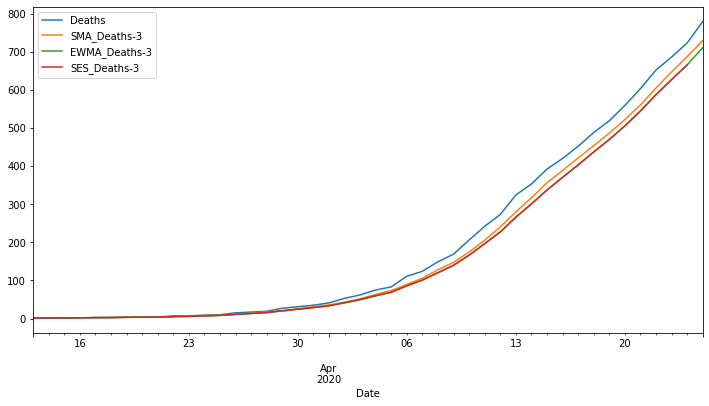

In [36]:
df[['Deaths','SMA_Deaths-3','EWMA_Deaths-3','SES_Deaths-3']]['2020-03-13':].plot(figsize=(12,6))

In [37]:
df['EWMA_Confirmed-3'] = df['Confirmed'].ewm(alpha=alpha,adjust=False).mean()
df['SES_Confirmed-3']=SimpleExpSmoothing(df['Confirmed']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df[['Confirmed','SMA_Confirmed-3','EWMA_Confirmed-3','SES_Confirmed-3']].head()

,Confirmed,SMA_Confirmed-3,EWMA_Confirmed-3,SES_Confirmed-3
Date,,,,
2020-01-30,1,NaN,1.000,1.000
2020-01-31,1,NaN,1.000,1.000
2020-02-01,2,1.333333,1.400,1.400
2020-02-02,3,2.000000,2.040,2.040
2020-02-03,3,2.666667,2.424,2.424


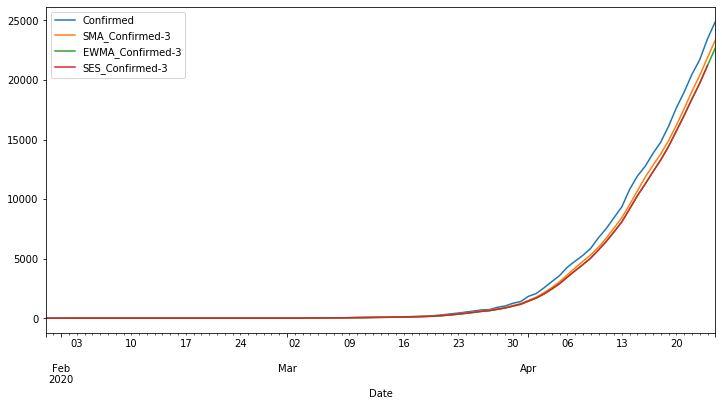

In [38]:
df[['Confirmed','SMA_Confirmed-3','EWMA_Confirmed-3','SES_Confirmed-3']].plot(figsize=(12,6))

# Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.


In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

Because we haven't yet considered seasonal fluctuations, the forecasting model is simply a straight sloped line extending from the most recent data point.

##Additivite and Multiplicative Model

The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

 **Additive Trend**: Double Exponential Smoothing with a linear trend,i.e., a straight-line sloped trend.

**Multiplicative Trend**: Double Exponential Smoothing with an exponential trend.

##Multiplicative model

In [39]:
train_data_Cured=df.iloc[33:70]
test_data_Cured=df.iloc[70:]
test_data_Cured['Cured']

Date
2020-04-09     478
2020-04-10     516
2020-04-11     653
2020-04-12     765
2020-04-13     980
2020-04-14    1190
2020-04-15    1344
2020-04-16    1515
2020-04-17    1767
2020-04-18    2015
2020-04-19    2302
2020-04-20    2842
2020-04-21    3260
2020-04-22    3960
2020-04-23    4325
2020-04-24    4814
2020-04-25    5210
Freq: D, Name: Cured, dtype: int64

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model=ExponentialSmoothing(train_data_Cured['Cured'], trend='mul').fit()
test_predictions_Cured=fitted_model.forecast(17).rename('Forecast Cured')
test_predictions_Cured

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


2020-04-09     487.404797
2020-04-10     570.384019
2020-04-11     667.490208
2020-04-12     781.128438
2020-04-13     914.113239
2020-04-14    1069.738309
2020-04-15    1251.858087
2020-04-16    1464.983216
2020-04-17    1714.392267
2020-04-18    2006.262470
2020-04-19    2347.822710
2020-04-20    2747.532569
2020-04-21    3215.291847
2020-04-22    3762.685756
2020-04-23    4403.271855
2020-04-24    5152.915840
2020-04-25    6030.184491
Freq: D, Name: Forecast Cured, dtype: float64

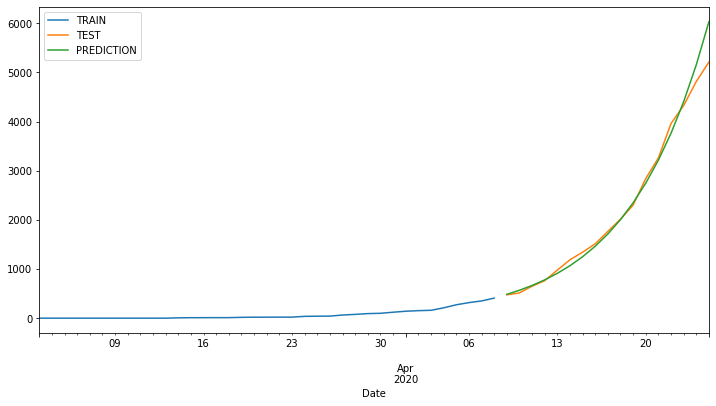

In [41]:
train_data_Cured['Cured'].plot(legend=True,label='TRAIN')
test_data_Cured['Cured'].plot(legend=True,label='TEST',figsize=(12,6))
test_predictions_Cured.plot(legend=True,label='PREDICTION');

In [42]:
#Calculation of RMSE(multlplcative model)
rmse_mul=np.sqrt(mean_squared_error(test_data_Cured['Cured'],test_predictions_Cured))
rmse_mul

227.75172348452907

Multiplicative models gives rmse =227.16

##Additive model for Cured Cases(DES)

In [43]:
train_data_Cured=df.iloc[33:70]
test_data_Cured=df.iloc[70:]
test_data_Cured['Cured']

Date
2020-04-09     478
2020-04-10     516
2020-04-11     653
2020-04-12     765
2020-04-13     980
2020-04-14    1190
2020-04-15    1344
2020-04-16    1515
2020-04-17    1767
2020-04-18    2015
2020-04-19    2302
2020-04-20    2842
2020-04-21    3260
2020-04-22    3960
2020-04-23    4325
2020-04-24    4814
2020-04-25    5210
Freq: D, Name: Cured, dtype: int64

In [44]:
fitted_model=ExponentialSmoothing(train_data_Cured['Cured'], trend='add').fit()
test_predictions_Cured=fitted_model.forecast(17).rename('Forecast Cured')
test_predictions_Cured

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


2020-04-09     460.128980
2020-04-10     509.257960
2020-04-11     558.386940
2020-04-12     607.515919
2020-04-13     656.644899
2020-04-14     705.773879
2020-04-15     754.902859
2020-04-16     804.031839
2020-04-17     853.160819
2020-04-18     902.289798
2020-04-19     951.418778
2020-04-20    1000.547758
2020-04-21    1049.676738
2020-04-22    1098.805718
2020-04-23    1147.934698
2020-04-24    1197.063677
2020-04-25    1246.192657
Freq: D, Name: Forecast Cured, dtype: float64

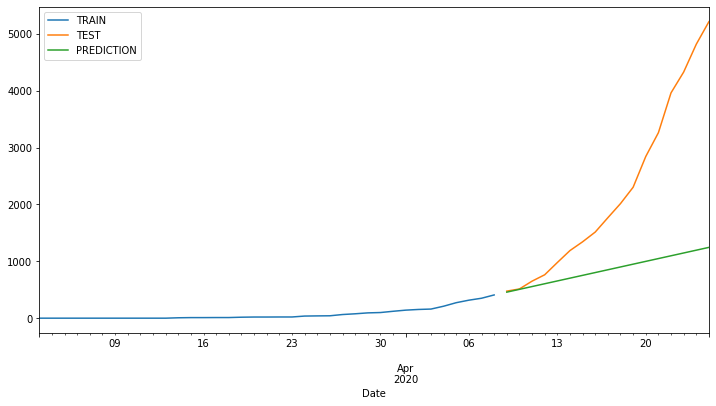

In [45]:
train_data_Cured['Cured'].plot(legend=True,label='TRAIN')
test_data_Cured['Cured'].plot(legend=True,label='TEST',figsize=(12,6))
test_predictions_Cured.plot(legend=True,label='PREDICTION');

In [46]:
#Calculation of RMSE(additive model)
rmse_add=np.sqrt(mean_squared_error(test_data_Cured['Cured'],test_predictions_Cured))
rmse_add

1886.0729034025833

Additive rmse is 1886.07

###We observe that multiplicative model gives the minimum RMSE value which is 227.16 for Cured Cases (DES)

## Forecasting for Death Cases

##Multiplicative model for Death Cases(DES)

In [47]:
train_data_Deaths=df.iloc[43:81]
test_data_Deaths=df.iloc[81:]
test_data_Deaths['Deaths']

Date
2020-04-20    559
2020-04-21    603
2020-04-22    652
2020-04-23    686
2020-04-24    723
2020-04-25    779
Freq: D, Name: Deaths, dtype: int64

In [48]:
fitted_model=ExponentialSmoothing(train_data_Deaths['Deaths'],trend='mul').fit()
test_predictions_Deaths=fitted_model.forecast(6).rename('Forecast Deaths')
test_predictions_Deaths

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2020-04-20    555.768784
2020-04-21    593.848990
2020-04-22    634.538378
2020-04-23    678.015724
2020-04-24    724.472055
2020-04-25    774.111484
Freq: D, Name: Forecast Deaths, dtype: float64

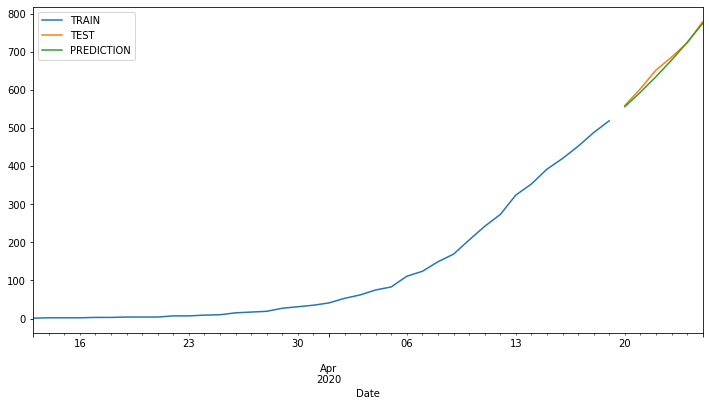

In [49]:
train_data_Deaths['Deaths'].plot(legend=True,label='TRAIN')
test_data_Deaths['Deaths'].plot(legend=True,label='TEST',figsize=(12,6))
test_predictions_Deaths.plot(legend=True,label='PREDICTION');

In [50]:
#Calculation of RMSE(multiplicative model)
rmse_mul=np.sqrt(mean_squared_error(test_data_Deaths['Deaths'],test_predictions_Deaths))
rmse_mul

9.026841413563819

In [51]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [52]:
mean_absolute_percentage_error(test_data_Deaths['Deaths'],test_predictions_Deaths)

1.128134701199765

Multiplicative model gives rmse=9.02

##Additive model for Deaths Cases(DES)

In [53]:
train_data_Deaths=df.iloc[43:81]
test_data_Deaths=df.iloc[81:]
test_data_Deaths['Deaths']

Date
2020-04-20    559
2020-04-21    603
2020-04-22    652
2020-04-23    686
2020-04-24    723
2020-04-25    779
Freq: D, Name: Deaths, dtype: int64

In [54]:
fitted_model=ExponentialSmoothing(train_data_Deaths['Deaths'],trend='add').fit()
test_predictions_Deaths=fitted_model.forecast(6).rename('Forecast Deaths')
test_predictions_Deaths

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2020-04-20    551.934402
2020-04-21    584.618466
2020-04-22    617.302530
2020-04-23    649.986594
2020-04-24    682.670658
2020-04-25    715.354722
Freq: D, Name: Forecast Deaths, dtype: float64

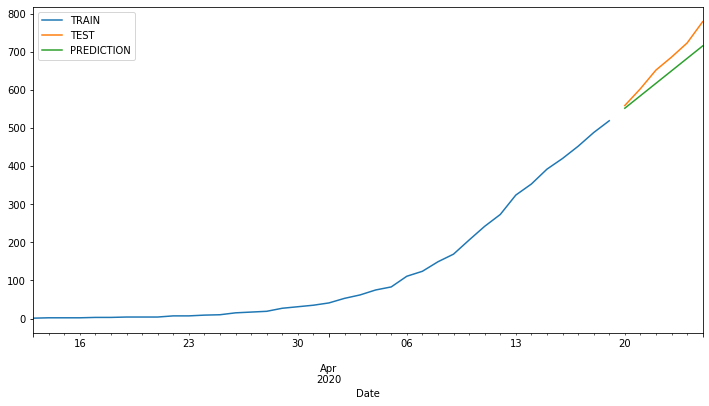

In [55]:
train_data_Deaths['Deaths'].plot(legend=True,label='TRAIN')
test_data_Deaths['Deaths'].plot(legend=True,label='TEST',figsize=(12,6))
test_predictions_Deaths.plot(legend=True,label='PREDICTION');

In [56]:
#Calculation of RMSE(additive model)
rmse_add=np.sqrt(mean_squared_error(test_data_Deaths['Deaths'],test_predictions_Deaths))
rmse_add                                                                                   #Showing the leasr rmse for Death cases,.i.e., 13.22

37.78416877016017

Additive model gives rmse=37.78

###We see that multiplicative model performs very well with a small error,i.e, RMSE =9.02 for Death Cases(DES)

##Forecasting of Confirmed Cases(DES)
###Multiplicative model

In [57]:
train_data_Confirmed=df.iloc[0:71]
test_data_Confirmed=df.iloc[71:]
test_data_Confirmed['Confirmed']

Date
2020-04-10     6761
2020-04-11     7529
2020-04-12     8447
2020-04-13     9352
2020-04-14    10815
2020-04-15    11933
2020-04-16    12759
2020-04-17    13835
2020-04-18    14792
2020-04-19    16116
2020-04-20    17656
2020-04-21    18985
2020-04-22    20471
2020-04-23    21700
2020-04-24    23452
2020-04-25    24893
Freq: D, Name: Confirmed, dtype: int64

In [58]:
fitted_model=ExponentialSmoothing(train_data_Confirmed['Confirmed'],trend='mul').fit()
test_predictions_Confirmed=fitted_model.forecast(16).rename('Forecast Confirmed')
test_predictions_Confirmed

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2020-04-10     6481.726853
2020-04-11     7152.909021
2020-04-12     7893.592035
2020-04-13     8710.972701
2020-04-14     9612.993054
2020-04-15    10608.417524
2020-04-16    11706.918098
2020-04-17    12919.168297
2020-04-18    14256.946883
2020-04-19    15733.252308
2020-04-20    17362.429012
2020-04-21    19160.306801
2020-04-22    21144.354656
2020-04-23    23333.850467
2020-04-24    25750.068351
2020-04-25    28416.485356
Freq: D, Name: Forecast Confirmed, dtype: float64

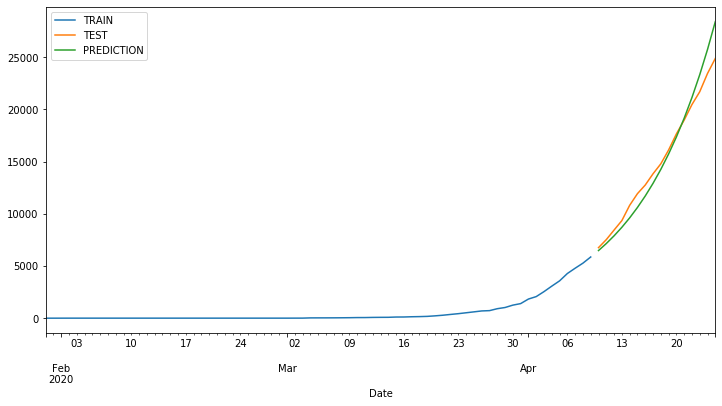

In [59]:
train_data_Confirmed['Confirmed'].plot(legend=True,label='TRAIN')
test_data_Confirmed['Confirmed'].plot(legend=True,label='TEST',figsize=(12,6))
test_predictions_Confirmed.plot(legend=True,label='PREDICTION');

In [60]:
#Calculation of RMSE(multiplicative model)
rmse_mul=np.sqrt(mean_squared_error(test_data_Confirmed['Confirmed'],test_predictions_Confirmed))
rmse_mul

1309.8237675969635

In [61]:
mean_absolute_percentage_error(test_data_Confirmed['Confirmed'],test_predictions_Confirmed)

6.4351332727281445

###Multiplicative model gives rmse=1309.82

##Additive model for Confirmed cases(DES)

In [62]:
train_data_Confirmed=df.iloc[0:71]
test_data_Confirmed=df.iloc[71:]
test_data_Confirmed['Confirmed']

Date
2020-04-10     6761
2020-04-11     7529
2020-04-12     8447
2020-04-13     9352
2020-04-14    10815
2020-04-15    11933
2020-04-16    12759
2020-04-17    13835
2020-04-18    14792
2020-04-19    16116
2020-04-20    17656
2020-04-21    18985
2020-04-22    20471
2020-04-23    21700
2020-04-24    23452
2020-04-25    24893
Freq: D, Name: Confirmed, dtype: int64

In [63]:
fitted_model=ExponentialSmoothing(train_data_Confirmed['Confirmed'],trend='add').fit()
test_predictions_Confirmed=fitted_model.forecast(16).rename('Forecast Confirmed')
test_predictions_Confirmed

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2020-04-10     6397.899397
2020-04-11     6942.708900
2020-04-12     7487.518403
2020-04-13     8032.327906
2020-04-14     8577.137408
2020-04-15     9121.946911
2020-04-16     9666.756414
2020-04-17    10211.565916
2020-04-18    10756.375419
2020-04-19    11301.184922
2020-04-20    11845.994425
2020-04-21    12390.803927
2020-04-22    12935.613430
2020-04-23    13480.422933
2020-04-24    14025.232435
2020-04-25    14570.041938
Freq: D, Name: Forecast Confirmed, dtype: float64

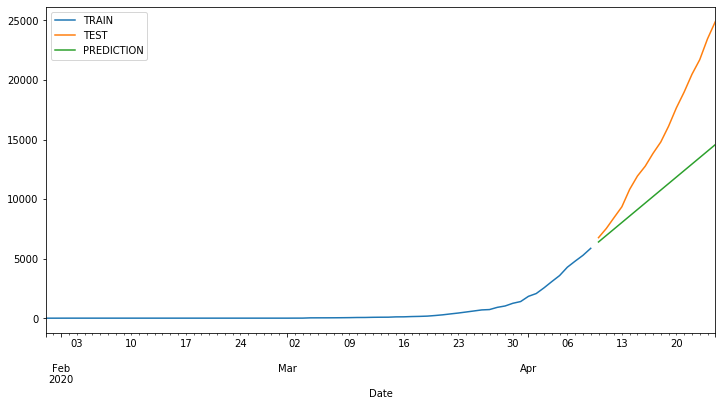

In [64]:
train_data_Confirmed['Confirmed'].plot(legend=True,label='TRAIN')
test_data_Confirmed['Confirmed'].plot(legend=True,label='TEST',figsize=(12,6))
test_predictions_Confirmed.plot(legend=True,label='PREDICTION');

In [65]:
#Calculation of RMSE(additive model)
rmse_add=np.sqrt(mean_squared_error(test_data_Confirmed['Confirmed'],test_predictions_Confirmed))
rmse_add

5449.87509316265

Additive model gives rmse value=5448.75

###We observe that multiplicative model for Confirmed Cases on Double Exponential Smoothing gives less error,i.e.1309.82  than that of additive rmse. 

# Triple Exponential Smoothing
With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle.

Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 




##Forecasting for Cured Cases


We have total 87 entries out of which only 55 are non zero starting from 33 index for Cured Cases which we take into account. We train our data on all data points except fot the last 17 observations on which we will try to predict the observations.

##Multiplicative model for Cured Cases(TES)

In [66]:
train_data_Cured = df.iloc[33:70] 
test_data_Cured = df.iloc[70:]
test_data_Cured['Cured']

Date
2020-04-09     478
2020-04-10     516
2020-04-11     653
2020-04-12     765
2020-04-13     980
2020-04-14    1190
2020-04-15    1344
2020-04-16    1515
2020-04-17    1767
2020-04-18    2015
2020-04-19    2302
2020-04-20    2842
2020-04-21    3260
2020-04-22    3960
2020-04-23    4325
2020-04-24    4814
2020-04-25    5210
Freq: D, Name: Cured, dtype: int64

In [67]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train_data_Cured['Cured'],trend='mul',seasonal='mul',seasonal_periods=11).fit()
test_predictions_Cured = fitted_model.forecast(17).rename('Forecast')
test_predictions_Cured

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


2020-04-09     549.275940
2020-04-10     588.686369
2020-04-11     714.128478
2020-04-12     825.557721
2020-04-13     893.677302
2020-04-14     933.009037
2020-04-15    1226.869840
2020-04-16    1576.805641
2020-04-17    1825.307635
2020-04-18    2034.586660
2020-04-19    2371.250569
2020-04-20    3158.018052
2020-04-21    3384.605159
2020-04-22    4105.824526
2020-04-23    4746.478041
2020-04-24    5138.126119
2020-04-25    5364.260783
Freq: D, Name: Forecast, dtype: float64

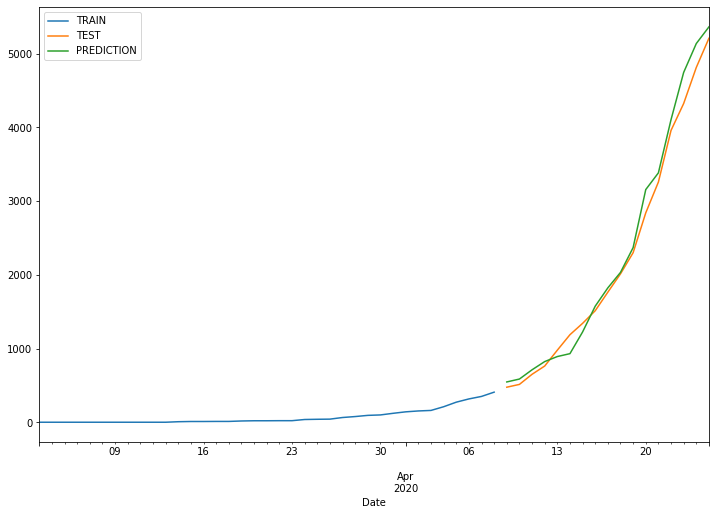

In [68]:
train_data_Cured['Cured'].plot(legend=True,label='TRAIN')
test_data_Cured['Cured'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions_Cured.plot(legend=True,label='PREDICTION');

In [69]:
#Calculation of RMSE
np.sqrt(mean_squared_error(test_data_Cured['Cured'],test_predictions_Cured))  

181.5842774012342

In [70]:
#Collection of all RMSEs corresponding to different number of periods(multiplicative model)
rmse_mul={4:461.15,5:402,6:307.08,7:260.23,8:216.25,9:938.99,10:290.28,11:185.87,12:204.48}

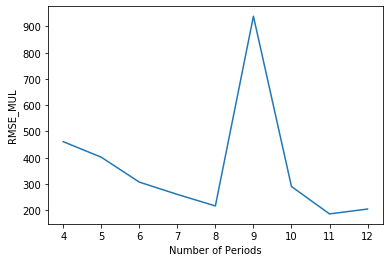

In [71]:
#Plotting the RMSE graph 
import matplotlib.pyplot as plt
plt.plot(*zip(*sorted(rmse_mul.items())))
plt.xlabel('Number of Periods')
plt.ylabel('RMSE_MUL')
plt.show()

###We see that the RMSE is minimum for Periods=11,i.e, giving the least error for it which is 185.87

##Additive model for Cured Cases(TES)

In [72]:
train_data_Cured = df.iloc[33:70] 
test_data_Cured = df.iloc[70:]
test_data_Cured['Cured']

Date
2020-04-09     478
2020-04-10     516
2020-04-11     653
2020-04-12     765
2020-04-13     980
2020-04-14    1190
2020-04-15    1344
2020-04-16    1515
2020-04-17    1767
2020-04-18    2015
2020-04-19    2302
2020-04-20    2842
2020-04-21    3260
2020-04-22    3960
2020-04-23    4325
2020-04-24    4814
2020-04-25    5210
Freq: D, Name: Cured, dtype: int64

In [73]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train_data_Cured['Cured'],trend='add',seasonal='add',seasonal_periods=9).fit()
test_predictions_Cured = fitted_model.forecast(17).rename('Forecast')
test_predictions_Cured

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2020-04-09     463.726429
2020-04-10     516.481402
2020-04-11     567.992189
2020-04-12     613.754833
2020-04-13     671.896643
2020-04-14     729.847815
2020-04-15     777.146191
2020-04-16     825.075105
2020-04-17     875.696273
2020-04-18     931.272605
2020-04-19     984.027578
2020-04-20    1035.538366
2020-04-21    1081.301010
2020-04-22    1139.442820
2020-04-23    1197.393992
2020-04-24    1244.692367
2020-04-25    1292.621282
Freq: D, Name: Forecast, dtype: float64

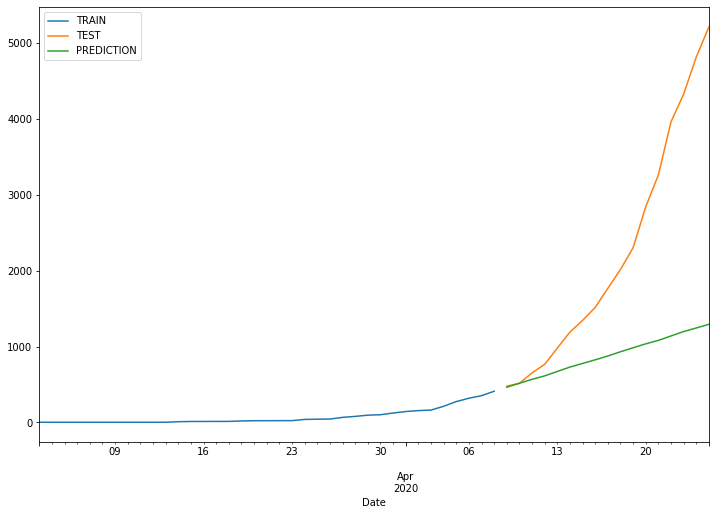

In [74]:
train_data_Cured['Cured'].plot(legend=True,label='TRAIN')
test_data_Cured['Cured'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions_Cured.plot(legend=True,label='PREDICTION');

In [75]:
#Calculation of RMSE
np.sqrt(mean_squared_error(test_data_Cured['Cured'],test_predictions_Cured)) 

1857.790266885549

In [76]:
#Collection of all RMSEs corresponding to different number of periods(additive model)
rmse_add={4:1942.07,5:1890.91,6:1898.89,7:1896.97,8:1893.92,9:1857.79,10:1903.46,11:1899.14}

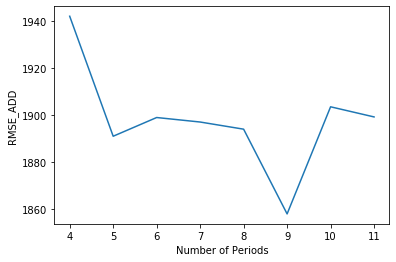

In [77]:
#Plotting the RMSE graph 
import matplotlib.pyplot as plt
plt.plot(*zip(*sorted(rmse_add.items())))
plt.xlabel('Number of Periods')
plt.ylabel('RMSE_ADD')
plt.show()

Additive model for Cured cases(TES) gives the least error,i.e rmse at periods=9 and rmse value is 1857.79

##Conclusion for Cured Cases(TES)
We observe that multiplicative model gives the least possible rmse value for periods=11 and that is 185.87

# Forecasting for total Death Cases


## Multiplicative model For Death Cases(TES)

In [89]:
train_data_Deaths = df.iloc[43:81] 
test_data_Deaths = df.iloc[81:]
test_data_Deaths['Deaths']

Date
2020-04-20    559
2020-04-21    603
2020-04-22    652
2020-04-23    686
2020-04-24    723
2020-04-25    779
Freq: D, Name: Deaths, dtype: int64

In [90]:
fitted_model = ExponentialSmoothing(train_data_Deaths['Deaths'],trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions_Deaths = fitted_model.forecast(6).rename('Forecast_Deaths')
test_predictions_Deaths

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2020-04-20    557.290626
2020-04-21    596.770346
2020-04-22    638.120740
2020-04-23    683.326647
2020-04-24    730.674552
2020-04-25    782.437179
Freq: D, Name: Forecast_Deaths, dtype: float64

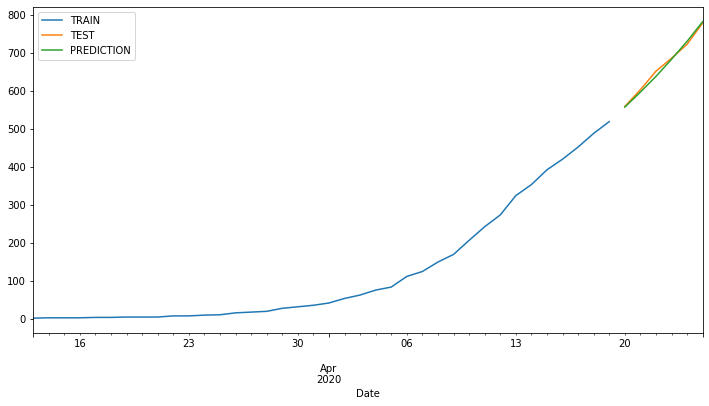

In [91]:
train_data_Deaths['Deaths'].plot(legend=True,label='TRAIN')
test_data_Deaths['Deaths'].plot(legend=True,label='TEST',figsize=(12,6))
test_predictions_Deaths.plot(legend=True,label='PREDICTION');

In [92]:
#Calculation of RMSE

rmse_mul=np.sqrt(mean_squared_error(test_data_Deaths['Deaths'],test_predictions_Deaths)) 
rmse_mul

7.213692713306832

In [93]:
#Collection of all RMSEs corresponding to different number of periods(multiplicative model)
rmse_mul={2:7.21,3:8.32,4:23.76,5:19.19,6:35.21,7:97.61,8:220.10,9:305.05}

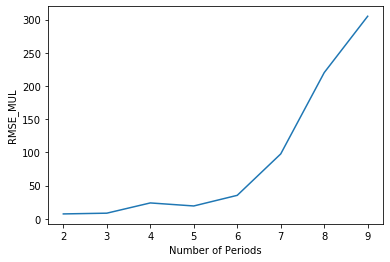

In [94]:
#Plotting the RMSE graph (multiplicative model)
import matplotlib.pyplot as plt
plt.plot(*zip(*sorted(rmse_mul.items())))
plt.xlabel('Number of Periods')
plt.ylabel('RMSE_MUL')
plt.show()

Here RMSE for multiplicative model is minimum for Periods=2, i.e, 7.21

##Applying additive model on the Death cases(TES)

In [95]:
train_data_Deaths=df.iloc[43:81] 
test_data_Deaths=df.iloc[81:]
test_data_Deaths['Deaths']

Date
2020-04-20    559
2020-04-21    603
2020-04-22    652
2020-04-23    686
2020-04-24    723
2020-04-25    779
Freq: D, Name: Deaths, dtype: int64

In [96]:
fitted_model = ExponentialSmoothing(train_data_Deaths['Deaths'],trend='add',seasonal='add',seasonal_periods=2).fit()
test_predictions_Deaths = fitted_model.forecast(6).rename('Forecast_Deaths')
test_predictions_Deaths

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2020-04-20    552.296549
2020-04-21    584.699802
2020-04-22    617.841167
2020-04-23    650.244420
2020-04-24    683.385785
2020-04-25    715.789038
Freq: D, Name: Forecast_Deaths, dtype: float64

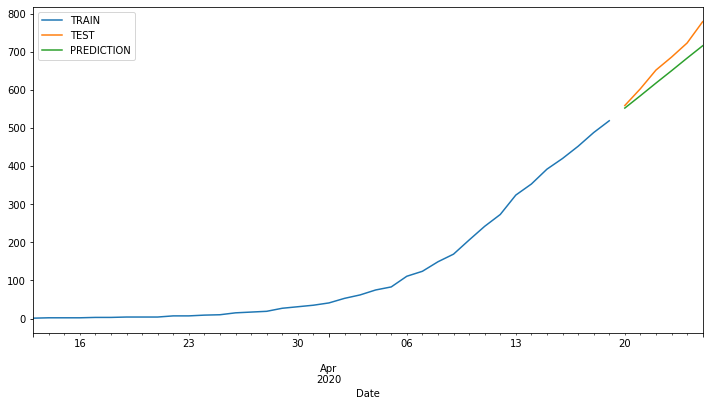

In [97]:
train_data_Deaths['Deaths'].plot(legend=True,label='TRAIN')
test_data_Deaths['Deaths'].plot(legend=True,label='TEST',figsize=(12,6))
test_predictions_Deaths.plot(legend=True,label='PREDICTION')

In [98]:
#Calculation of RMSE(Additive model)

rmse_add=np.sqrt(mean_squared_error(test_data_Deaths['Deaths'],test_predictions_Deaths)) 
rmse_add                                                                                                   #Showing the least rmse for periods=9

37.39436808612623

In [99]:
#Collection of all RMSEs corresponding to different number of periods(additive model)
rmse_add={2:38.97,3:38.48,4:37.76,5:38.16,6:36.38,7:31.55,8:42.48,9:34.95}

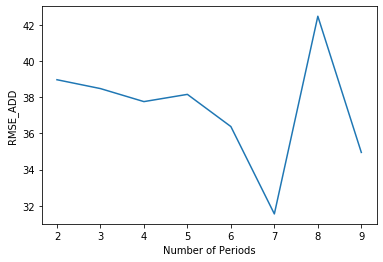

In [100]:
#Plotting the RMSE graph (additive model)
import matplotlib.pyplot as plt
plt.plot(*zip(*sorted(rmse_add.items())))
plt.xlabel('Number of Periods')
plt.ylabel('RMSE_ADD')
plt.show()

Here RMSE for additive model is minimum for Periods=7 and the error is 31.55

###Conclusion for Death cases (DES)-
So we observed that in case of Triple Exponential Smoothing on applying both the multiplicative and additive models to Death cases, multiplicative model gives the least error possible and that too for number of periods=2. the RMSE value it gives is 7.21 which accounts for very less error.

# Forecasting For Confirmed Cases
As all the values of Confirmed Cases are non zero from the very start of the data. So we take all the observations for training except for the last 16 observations which we use as prediction data.

##Multiplicative model for Confirmed cases (TES)

In [101]:
train_data = df.iloc[0:71] 
test_data = df.iloc[71:]
test_data['Confirmed']

Date
2020-04-10     6761
2020-04-11     7529
2020-04-12     8447
2020-04-13     9352
2020-04-14    10815
2020-04-15    11933
2020-04-16    12759
2020-04-17    13835
2020-04-18    14792
2020-04-19    16116
2020-04-20    17656
2020-04-21    18985
2020-04-22    20471
2020-04-23    21700
2020-04-24    23452
2020-04-25    24893
Freq: D, Name: Confirmed, dtype: int64

In [102]:
fitted_model = ExponentialSmoothing(train_data['Confirmed'],trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(16).rename('Forecast_Confirmed')
test_predictions

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


2020-04-10     6470.445720
2020-04-11     7148.124478
2020-04-12     7868.867923
2020-04-13     8693.009701
2020-04-14     9569.523502
2020-04-15    10571.782555
2020-04-16    11637.732512
2020-04-17    12856.604357
2020-04-18    14152.932274
2020-04-19    15635.232255
2020-04-20    17211.728466
2020-04-21    19014.389871
2020-04-22    20931.605624
2020-04-23    23123.866423
2020-04-24    25455.439578
2020-04-25    28121.501767
Freq: D, Name: Forecast_Confirmed, dtype: float64

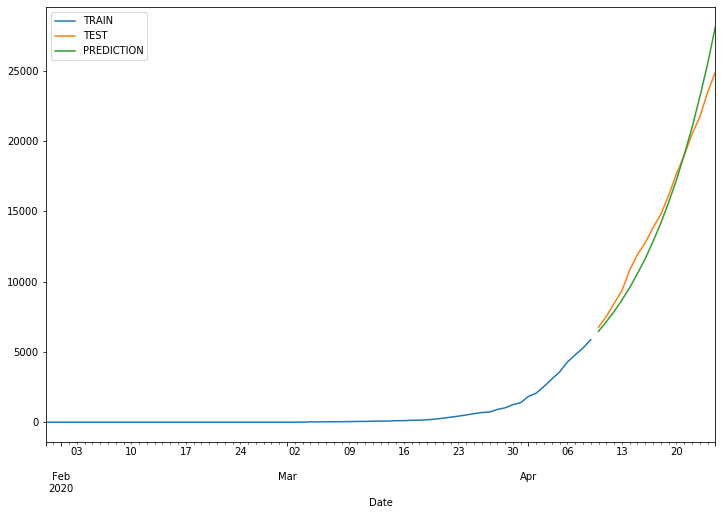

In [103]:
train_data['Confirmed'].plot(legend=True,label='TRAIN')
test_data['Confirmed'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [104]:
#Collection of all RMSEs corresponding to different number of periods(multiplicative model)
rmse=np.sqrt(mean_squared_error(test_data['Confirmed'],test_predictions))
rmse

1228.0815678896568

In [105]:
rmse_mul={2:1227.96,3:2139.33,4:2215.94,5:1430.71,6:7303.54,7:21622.06,9:30883.50}

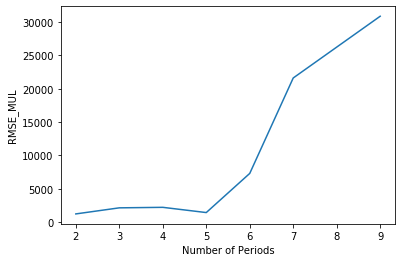

In [106]:
#Plotting the RMSE graph (multiplicative model)
import matplotlib.pyplot as plt
plt.plot(*zip(*sorted(rmse_mul.items())))
plt.xlabel('Number of Periods')
plt.ylabel('RMSE_MUL')
plt.show()

We achieve minimum error at periods=2 and the rmse value is 1227.96

##Additive model for Confirmed cases(TES)

In [107]:
train_data = df.iloc[0:71] 
test_data = df.iloc[71:]
test_data['Confirmed']

Date
2020-04-10     6761
2020-04-11     7529
2020-04-12     8447
2020-04-13     9352
2020-04-14    10815
2020-04-15    11933
2020-04-16    12759
2020-04-17    13835
2020-04-18    14792
2020-04-19    16116
2020-04-20    17656
2020-04-21    18985
2020-04-22    20471
2020-04-23    21700
2020-04-24    23452
2020-04-25    24893
Freq: D, Name: Confirmed, dtype: int64

In [108]:
fitted_model = ExponentialSmoothing(train_data['Confirmed'],trend='add',seasonal='add',seasonal_periods=9).fit()
test_predictions = fitted_model.forecast(16).rename('Forecast_Confirmed')
test_predictions

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2020-04-10     6462.845724
2020-04-11     6962.880051
2020-04-12     7566.950463
2020-04-13     8130.202702
2020-04-14     8664.647530
2020-04-15     9291.961034
2020-04-16     9790.481612
2020-04-17    10350.225763
2020-04-18    10907.927289
2020-04-19    11524.380984
2020-04-20    12024.415310
2020-04-21    12628.485722
2020-04-22    13191.737961
2020-04-23    13726.182789
2020-04-24    14353.496293
2020-04-25    14852.016871
Freq: D, Name: Forecast_Confirmed, dtype: float64

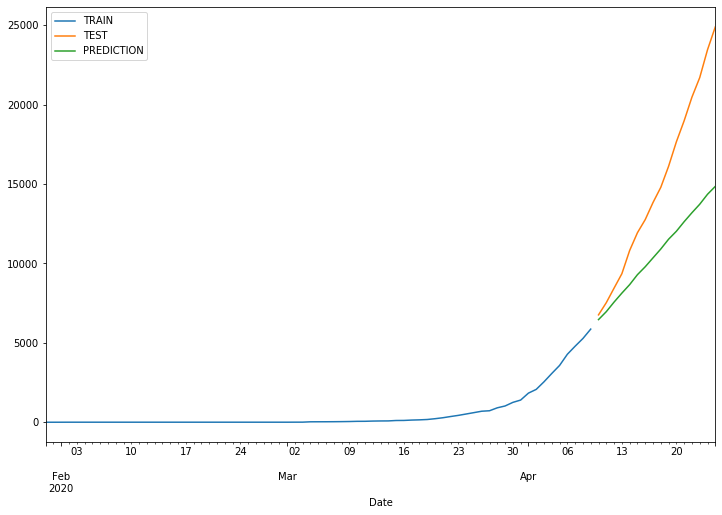

In [109]:
train_data['Confirmed'].plot(legend=True,label='TRAIN')
test_data['Confirmed'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [110]:
#Collection of all RMSEs corresponding to different number of periods(additive model)
rmse=np.sqrt(mean_squared_error(test_data['Confirmed'],test_predictions))
rmse

5266.011617119077

In [111]:
rmse_add_new={2:5448.75,3:5546.13,4:5452.54,5:5501.69,6:5532.47,7:5435.74,8:5448.59,9:5266.01,10:5465.13}

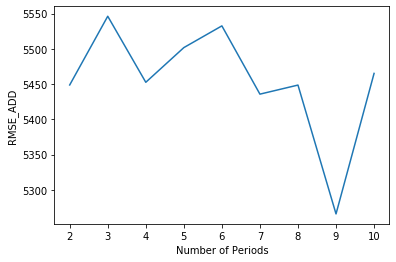

In [112]:
#Plotting the RMSE graph (additive model)
import matplotlib.pyplot as plt
plt.plot(*zip(*sorted(rmse_add_new.items())))
plt.xlabel('Number of Periods')
plt.ylabel('RMSE_ADD')
plt.show()

Additive model gives the least error for periods=9 and the rmse value is 5266.01

###Conclusion for Confirmed Cases(TES)
Multiplicative model gives the least possible error for periods=2 and the rmse value is 1227.96

#Conclusion from all the models we have applied
##Cured Cases- 
Triple Exponential Smoothing multiplicative model performs the best with an error of 185.87 for periods=11

##Death Cases- 
Triple Exponential Smoothing multiplicative model performs the best with an error of 7.21 for periods=2

##Confirmed Cases- 
Triple Exponential Smoothing multiplicative model performs the best with an error of 1227.96 for periods=2

#Forecasting for next 20 days

##Cured Forecasting

In [113]:
test_data_Confirmed['Confirmed'],test_predictions_Confirmed

(Date
 2020-04-10     6761
 2020-04-11     7529
 2020-04-12     8447
 2020-04-13     9352
 2020-04-14    10815
 2020-04-15    11933
 2020-04-16    12759
 2020-04-17    13835
 2020-04-18    14792
 2020-04-19    16116
 2020-04-20    17656
 2020-04-21    18985
 2020-04-22    20471
 2020-04-23    21700
 2020-04-24    23452
 2020-04-25    24893
 Freq: D, Name: Confirmed, dtype: int64,
 2020-04-10     6397.899397
 2020-04-11     6942.708900
 2020-04-12     7487.518403
 2020-04-13     8032.327906
 2020-04-14     8577.137408
 2020-04-15     9121.946911
 2020-04-16     9666.756414
 2020-04-17    10211.565916
 2020-04-18    10756.375419
 2020-04-19    11301.184922
 2020-04-20    11845.994425
 2020-04-21    12390.803927
 2020-04-22    12935.613430
 2020-04-23    13480.422933
 2020-04-24    14025.232435
 2020-04-25    14570.041938
 Freq: D, Name: Forecast Confirmed, dtype: float64)

In [115]:
train_data_Cured=df.iloc[33:]

In [116]:
fitted_model = ExponentialSmoothing(train_data_Cured['Cured'],trend='mul',seasonal='mul',seasonal_periods=11).fit()
test_predictions = fitted_model.forecast(20).rename('Forecast_Cured')
test_predictions

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


2020-04-26     5424.978574
2020-04-27     5757.907793
2020-04-28     6392.320072
2020-04-29     7029.340741
2020-04-30     7832.566613
2020-05-01     9469.867554
2020-05-02    10695.094603
2020-05-03    12865.167153
2020-05-04    13970.318906
2020-05-05    15535.149867
2020-05-06    16812.444413
2020-05-07    17504.226100
2020-05-08    18578.454919
2020-05-09    20625.448435
2020-05-10    22680.858180
2020-05-11    25272.545333
2020-05-12    30555.457601
2020-05-13    34508.772991
2020-05-14    41510.725173
2020-05-15    45076.605829
Freq: D, Name: Forecast_Cured, dtype: float64

##Death Forecasting

In [117]:
train_data_Deaths=df.iloc[43:]

In [118]:
fitted_model = ExponentialSmoothing(train_data_Deaths['Deaths'],trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(20).rename('Forecast_Deaths')
test_predictions

C:\Users\jaisw\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


2020-04-26     826.870239
2020-04-27     879.715276
2020-04-28     938.869511
2020-04-29     998.872389
2020-04-30    1066.039044
2020-05-01    1134.169289
2020-05-02    1210.433643
2020-05-03    1287.792106
2020-05-04    1374.386439
2020-05-05    1462.223077
2020-05-06    1560.546580
2020-05-07    1660.280659
2020-05-08    1771.922045
2020-05-09    1885.165068
2020-05-10    2011.928240
2020-05-11    2140.509989
2020-05-12    2284.443186
2020-05-13    2430.441286
2020-05-14    2593.870182
2020-05-15    2759.643672
Freq: D, Name: Forecast_Deaths, dtype: float64

#Confirmed Cases Forecasting

In [119]:
train_data_Confirmed=df.iloc[:]

In [120]:
fitted_model = ExponentialSmoothing(train_data_Confirmed['Confirmed'],trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(20).rename('Forecast_Confirmed')
test_predictions

2020-04-26    26772.349543
2020-04-27    28495.402606
2020-04-28    30630.355914
2020-04-29    32601.708055
2020-04-30    35044.316970
2020-05-01    37299.749113
2020-05-02    40094.348082
2020-05-03    42674.797331
2020-05-04    45872.109577
2020-05-05    48824.412243
2020-05-06    52482.470417
2020-05-07    55860.212115
2020-05-08    60045.411611
2020-05-09    63909.899868
2020-05-10    68698.203932
2020-05-11    73119.580940
2020-05-12    78597.899437
2020-05-13    83656.415171
2020-05-14    89924.182037
2020-05-15    95711.650823
Freq: D, Name: Forecast_Confirmed, dtype: float64